Exploratory Data Analysis.

In [1]:
#Importing Pandas for EDA
import pandas as pd

In [2]:
#Loading the Dataset
mining = pd.read_csv('/Users/harshavardhan/Downloads/archive (8)/calories.csv')

In [3]:
#Understanding the first 10 data entries.
mining.head(10)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0
6,19602372,112.0
7,11117088,143.0
8,12132339,134.0
9,17964668,72.0


In [4]:
#Checking the count of the first csv file
len(mining)

15000

In [5]:
#Loading the exercise dataset file.
data_min = pd.read_csv('/Users/harshavardhan/Downloads/archive (8)/exercise.csv')

In [6]:
#Reading the first 7 enteries in the dataset.
data_min.head(7)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5


Since, There are two datasets in our project, One which contains user_id and calories count and the other with the age height weight and other features we concatinate them.

In [7]:
#Concat functions in pandas helps join either a column or row or either two datasets together.
Project = pd.concat([data_min, mining['Calories']], axis=1)

In [8]:
#Reading the dataset after joining the calories column.
Project.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
#Understanding the datatypes of each column.
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
#Checking for null values.
Project.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
#Adding another feature to the dataset such as BMI along with the cateogories range of the BMI.
#Using the Formula to calculate BMI.
Project['BMI'] = Project['Weight'] / ((Project['Height'] / 100) ** 2)


In [12]:
# Categorizing BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'

Project['Weight_Status'] = Project['BMI'].apply(categorize_bmi)

print(Project)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5   

       Calories        BMI 

In [13]:
Project['Weight_Status'].value_counts()

Weight_Status
Healthy Weight    9792
Overweight        5208
Name: count, dtype: int64

In [14]:
#Reading in the data again
Project.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Weight_Status
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,Overweight
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,Healthy Weight
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,Healthy Weight
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,Healthy Weight
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,Healthy Weight


Data Visualisation.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 800x600 with 0 Axes>

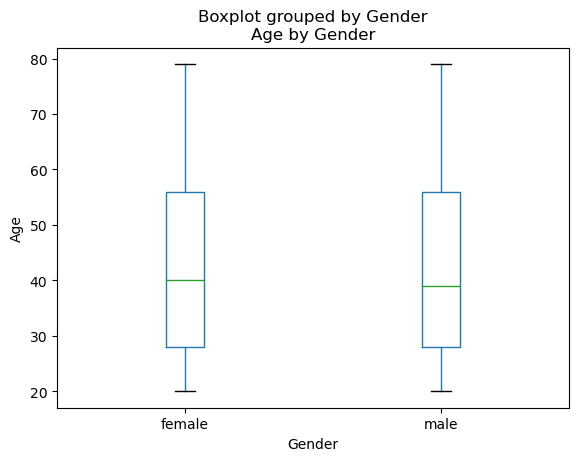

In [16]:
#Age by Gender
plt.figure(figsize=(8, 6))
Project.boxplot(column='Age', by='Gender')
plt.title('Age by Gender')
plt.ylabel('Age')
plt.xlabel('Gender')
plt.grid(False)
plt.show()

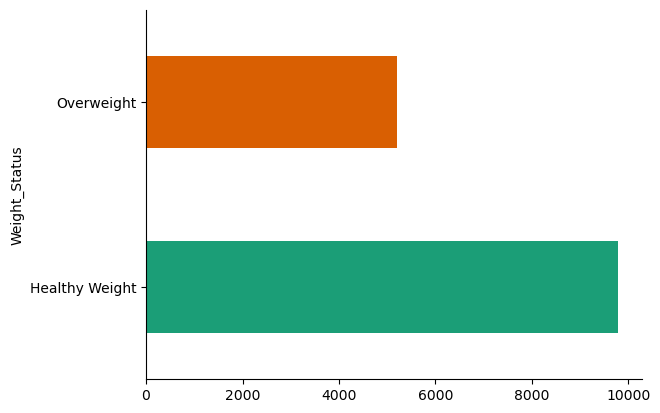

In [17]:
#Count of Weight_status to the count in the dataset.
Project.groupby('Weight_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

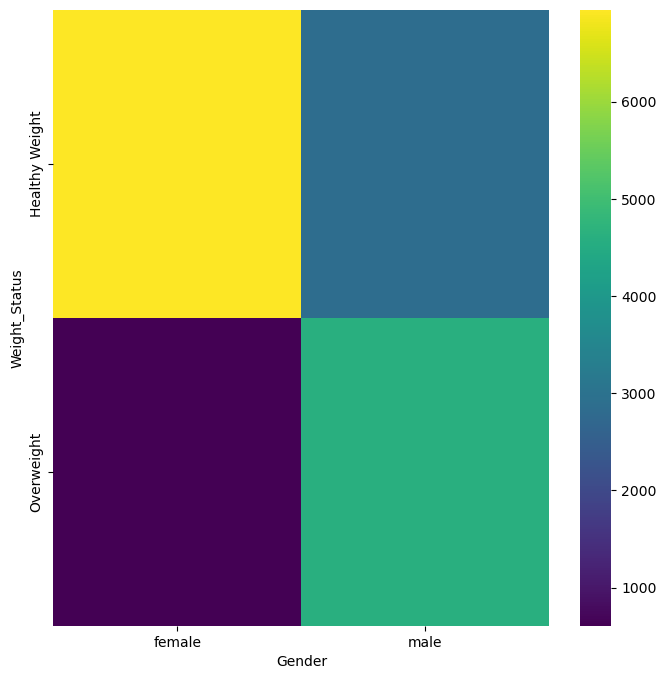

In [18]:
#Heat map of Gender and Weight_Status.

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Weight_Status'].value_counts()
    for x_label, grp in Project.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Weight_Status')

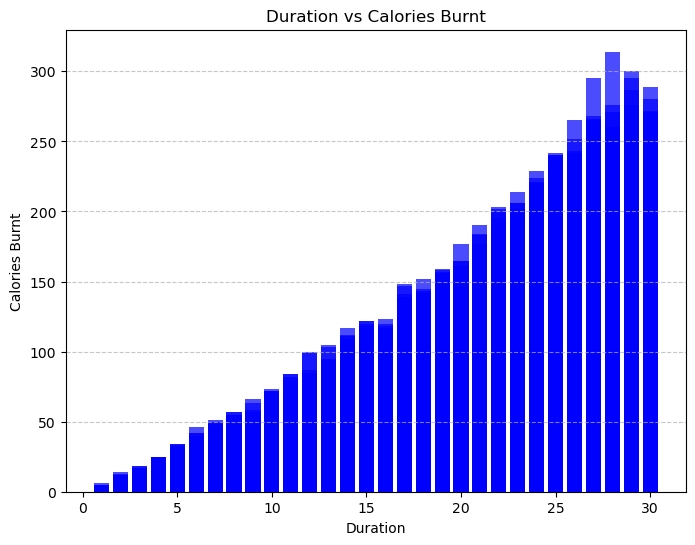

In [19]:
#Duration vs Calories Burnt
plt.figure(figsize=(8, 6))
plt.bar(Project['Duration'], Project['Calories'], color='b', alpha=0.7)
plt.title('Duration vs Calories Burnt')
plt.xlabel('Duration')
plt.ylabel('Calories Burnt')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

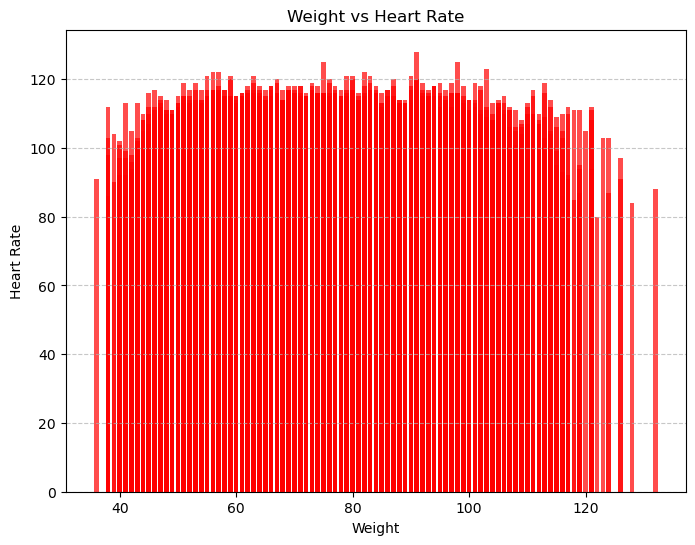

In [20]:
#Weight vs Heart Rate
plt.figure(figsize=(8, 6))
plt.bar(Project['Weight'], Project['Heart_Rate'], color='red', alpha=0.7)
plt.title('Weight vs Heart Rate')
plt.xlabel('Weight')
plt.ylabel('Heart Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

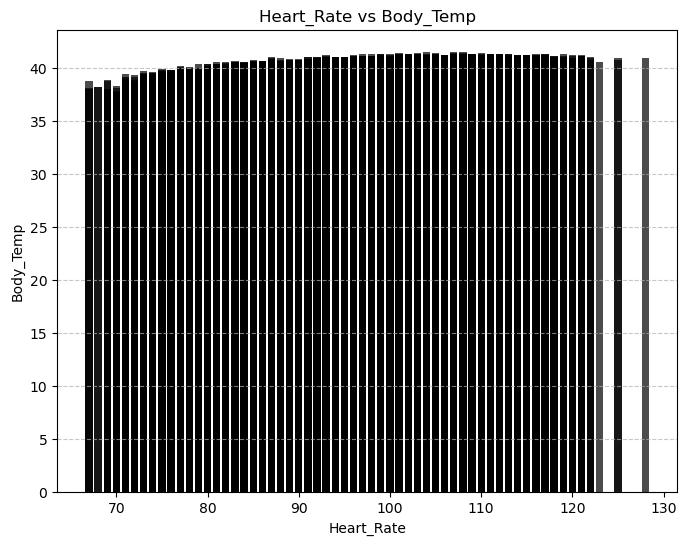

In [21]:
#Heart_Rate vs Body_Temp
plt.figure(figsize=(8, 6))
plt.bar(Project['Heart_Rate'], Project['Body_Temp'], color='black', alpha=0.7)
plt.title('Heart_Rate vs Body_Temp')
plt.xlabel('Heart_Rate')
plt.ylabel('Body_Temp')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Model Implementation.

In [22]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [23]:
#Checking Datatype of our dataset.
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_ID        15000 non-null  int64  
 1   Gender         15000 non-null  object 
 2   Age            15000 non-null  int64  
 3   Height         15000 non-null  float64
 4   Weight         15000 non-null  float64
 5   Duration       15000 non-null  float64
 6   Heart_Rate     15000 non-null  float64
 7   Body_Temp      15000 non-null  float64
 8   Calories       15000 non-null  float64
 9   BMI            15000 non-null  float64
 10  Weight_Status  15000 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.3+ MB


In [24]:
#Since Gender and Weight Status are in Objects we converted them to int.
Project.replace({'Gender':{'male':0,'female':1}}, inplace=True)
Project.replace({'Weight_Status':{'Healthy Weight':0,'Overweight':1}}, inplace=True)
Project.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Weight_Status
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,1
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,0


In [25]:
Project['Gender'].value_counts()

Gender
1    7553
0    7447
Name: count, dtype: int64

In [26]:
Project['Weight_Status'].value_counts()

Weight_Status
0    9792
1    5208
Name: count, dtype: int64

In [27]:
# Selecting features and target variable
X = Project.drop(['User_ID', 'Calories'], axis=1)
y = Project['Calories']

In [28]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0           0   68   190.0    94.0      29.0       105.0       40.8   
1           1   20   166.0    60.0      14.0        94.0       40.3   
2           0   69   179.0    79.0       5.0        88.0       38.7   
3           1   34   179.0    71.0      13.0       100.0       40.5   
4           1   27   154.0    58.0      10.0        81.0       39.8   
...       ...  ...     ...     ...       ...         ...        ...   
14995       1   20   193.0    86.0      11.0        92.0       40.4   
14996       1   27   165.0    65.0       6.0        85.0       39.2   
14997       1   43   159.0    58.0      16.0        90.0       40.1   
14998       0   78   193.0    97.0       2.0        84.0       38.3   
14999       0   63   173.0    79.0      18.0        92.0       40.5   

             BMI  Weight_Status  
0      26.038781              1  
1      21.773842              0  
2      24.655910              0  
3      22.1

In [29]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [30]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [31]:
XG_model = XGBRegressor()
XG_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
predictions = XG_model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np


In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.961489651735103


In [35]:
# Calculating Root Mean Squared Error (RMSE)

rmse = np.sqrt(mse)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

print(rmse)
print(mae)

2.2274401567124316
1.5287106871604919


In [36]:
# Loading the model

model = XG_model

# Defining a function to calculate BMI
def calculate_bmi(height, weight):
    height_meters = height / 100
    return weight / (height_meters ** 2)

# Defining a function to make predictions
def predict_calories_burnt(gender, age, height, weight, duration, heart_rate, body_temp, bmi, weight_status):
    # Making prediction
    prediction = model.predict([[gender, age, height, weight, duration, heart_rate, body_temp, bmi, weight_status]])

    return prediction[0]

# Taking a user input for height and weight
height = float(input("Enter your height in cm: "))
weight = float(input("Enter your weight in kg: "))

# Calculating BMI
bmi = calculate_bmi(height, weight)
print("BMI:", bmi)


Enter your height in cm: 175
Enter your weight in kg: 88
BMI: 28.73469387755102


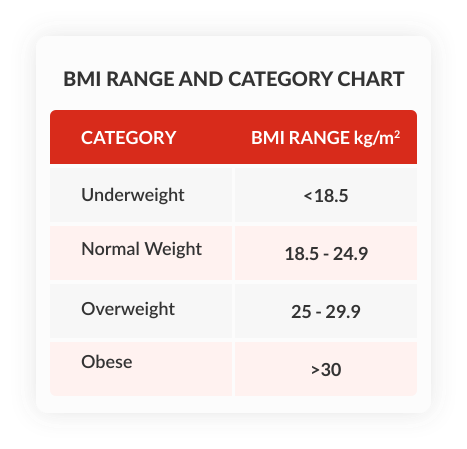

In [37]:
# Taking user input for other features
gender = input("Enter your gender (male/female): ")
gender_num = 0 if gender.lower() == "male" else 1

age = int(input("Enter your age: "))
duration = float(input("Enter duration of activity in minutes: "))
heart_rate = float(input("Enter your heart rate: "))
body_temp = float(input("Enter your body temperature: "))
weight_status = input("Enter your weight status (Underweight/Healthy Weight/Overweight): ")
weight_status_num = 0 if weight_status.lower() == "underweight" else 1 if weight_status.lower() == "healthy weight" else 2

# Predicting calories burnt
prediction = predict_calories_burnt(gender_num, age, height, weight, duration, heart_rate, body_temp, bmi, weight_status_num)
print("Predicted calories burnt:", prediction)


Enter your gender (male/female): male
Enter your age: 36
Enter duration of activity in minutes: 45
Enter your heart rate: 77
Enter your body temperature: 36.8
Enter your weight status (Underweight/Healthy Weight/Overweight): Overweight
Predicted calories burnt: 135.5236


In [38]:
#Installing Streamlit.

!pip install streamlit

In [39]:
#Importing Streamlit library
import streamlit as st

In [41]:
#Loading streamlit entry point through anaconda
!conda install -c conda-forge streamlit


Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (/Users/harshavardhan/anaconda3/lib/python3.11/site-packages/conda/plugins/types.py))
Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (/Users/harshavardhan/anaconda3/lib/python3.11/site-packages/conda/plugins/types.py))
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



# All requested packages already installed.



In [42]:
#Importing pickles model to write it and open it in app.py files

In [43]:
import pickle

model = XG_model


# Save the trained model as a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [44]:
# Load the trained model
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [45]:
%%writefile app.py

import streamlit as st
import pickle
import pandas as pd
from xgboost import XGBRegressor

# Load the trained model
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Define a function to calculate BMI
def calculate_bmi(height, weight):
    if height == 0:
        return 0  # or any default value you prefer
    height_meters = height / 100
    return weight / (height_meters ** 2)


# Define a function to make predictions
def predict_calories_burnt(gender, age, height, weight, duration, heart_rate, body_temp, bmi, weight_status):
    # Make prediction
    prediction = model.predict([[gender, age, height, weight, duration, heart_rate, body_temp, bmi, weight_status]])
    return prediction[0]

# Streamlit app
def main():
    st.title("Calories Burnt Prediction")
    

    # User inputs
    height = st.number_input("Enter your height in cm:", min_value=0.0, step=1.0)
    weight = st.number_input("Enter your weight in kg:", min_value=0.0, step=1.0)
    gender = st.selectbox("Select your gender", ["Male", "Female"])
    age = st.number_input("Enter your age:", min_value=0, step=1)
    duration = st.number_input("Enter duration of activity in minutes:", min_value=0.0, step=1.0)
    heart_rate = st.number_input("Enter your heart rate:", min_value=0.0, step=1.0)
    body_temp = st.number_input("Enter your body temperature:", min_value=0.0, step=0.1)
    weight_status = st.selectbox("Select your weight status", ["Healthy Weight", "Overweight"])

    # Encode gender and weight status
    gender_num = 0 if gender == "Male" else 1
    weight_status_label = 0 if weight_status == "Healthy Weight" else 1

    # Calculate BMI
    bmi = calculate_bmi(height, weight)
    st.write("BMI:", bmi)

    # Predict calories burnt
    if st.button("Predict"):
        prediction = predict_calories_burnt(gender_num, age, height, weight, duration, heart_rate, body_temp, bmi, weight_status_label)
        st.write("Predicted calories burnt:", round(prediction, 2))

if __name__ == "__main__":
    main()


Overwriting app.py


In [ ]:
!streamlit run app.py



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://10.3.31.147:8501

